In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file_path = 'SharkTank_Cleaned_Data1.csv'
df = pd.read_csv(file_path)

In [26]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Episode Number       117 non-null    int64 
 1   Pitch Number         117 non-null    int64 
 2   Brand                117 non-null    object
 3   Idea                 117 non-null    object
 4   Investment Amount    117 non-null    int64 
 5   Debt (In lakhs INR)  117 non-null    int64 
 6   Equity               117 non-null    object
 7   Anupam               117 non-null    object
 8   Ashneer              117 non-null    object
 9   Namita               117 non-null    object
 10  Aman                 117 non-null    object
 11  Peyush               117 non-null    object
 12  Vineeta              117 non-null    object
 13  Ghazal               117 non-null    object
 14  Season               117 non-null    int64 
 15  Deal Status          117 non-null    object
 

In [27]:
df.rename(columns={
    'Brand': 'Startup Name',
    'Investment Amount': 'Funding Amount',
    'Idea': 'Industry',
    'Deal Status': 'Funding Stage',
    'Equity': 'Equity Given',
    'Debt (In lakhs INR)': 'Debt Amount',
    'Season': 'Season Number'
}, inplace=True)

In [28]:
investors = ['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']
df['Investor Count'] = df[investors].apply(lambda x: (x != 'NA').sum(), axis=1)

In [29]:
industry_funding = df.groupby('Industry')['Funding Amount'].sum().sort_values(ascending=False)

In [30]:
stage_funding = df.groupby('Funding Stage')['Funding Amount'].sum().sort_values(ascending=False)

In [31]:
top_10_startups = df[['Startup Name', 'Funding Amount']].sort_values(by='Funding Amount', ascending=False).head(10)

In [32]:
sns.set(style="whitegrid")

/tmp/ipython-input-33-3014671305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_funding.values[:10], y=industry_funding.index[:10], palette='crest')


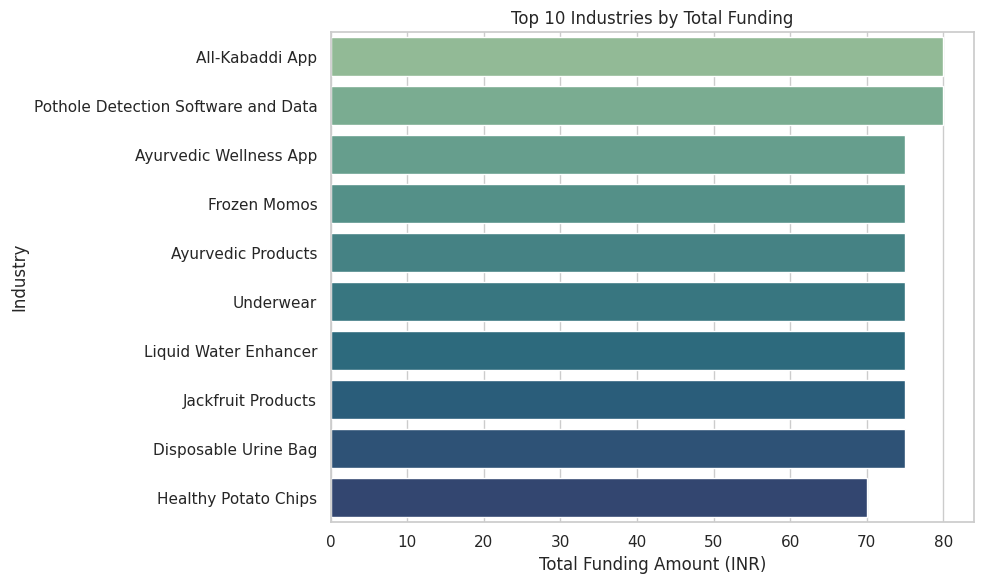

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_funding.values[:10], y=industry_funding.index[:10], palette='crest')
plt.title('Top 10 Industries by Total Funding')
plt.xlabel('Total Funding Amount (INR)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-1628997443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_funding.index, y=stage_funding.values, palette='flare')


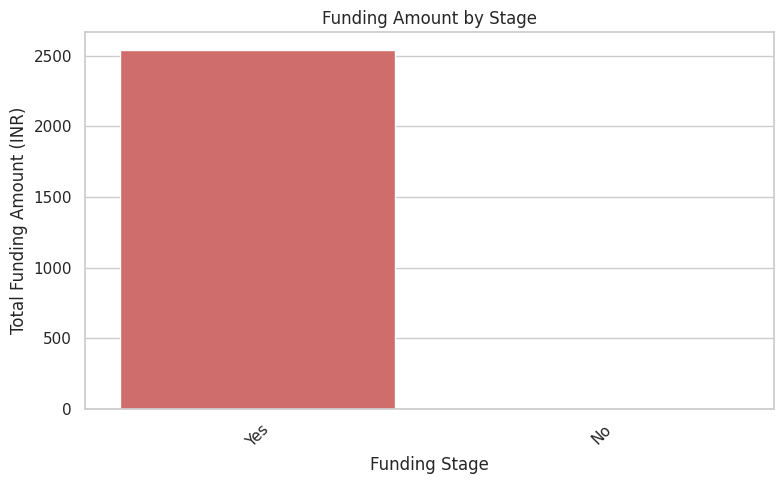

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=stage_funding.index, y=stage_funding.values, palette='flare')
plt.title('Funding Amount by Stage')
plt.ylabel('Total Funding Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
print("\nTop 10 Funded Startups:")
print(top_10_startups)


Top 10 Funded Startups:
            Startup Name  Funding Amount
52            RoadBounce              80
95          Kabaddi Adda              80
11                Bummer              75
33        Auli Lifestyle              75
7              Peeschute              75
47          Beyond Water              75
100             AyuRythm              75
91           Wakao Foods              75
0    BluePine Industries              75
3             Tagz Foods              70


In [36]:

print("\nTop 5 Funded Industries:")
print(industry_funding.head())


Top 5 Funded Industries:
Industry
All-Kabaddi App                        80
Pothole Detection Software and Data    80
Ayurvedic Wellness App                 75
Frozen Momos                           75
Ayurvedic Products                     75
Name: Funding Amount, dtype: int64


In [37]:

print("\nFunding by Stage:")
print(stage_funding)


Funding by Stage:
Funding Stage
Yes    2537
No        0
Name: Funding Amount, dtype: int64
